# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, ZeroPadding2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


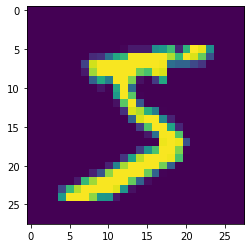

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 5, name = 'conv2d_14'))
model.add(Flatten())
model.add(Activation('softmax'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 5, 5, 64)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#checkpoint = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

In [23]:
model.fit(X_train, Y_train, batch_size=64, epochs=15, verbose=1)

Epoch 1/15
60000/60000 [==============================] - 6s 106us/step - loss: 0.2607 - acc: 0.9191
Epoch 2/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.0811 - acc: 0.9747
Epoch 3/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.0631 - acc: 0.9799
Epoch 4/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0550 - acc: 0.9824
Epoch 5/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.0517 - acc: 0.9837
Epoch 6/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.0474 - acc: 0.9847
Epoch 7/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.0430 - acc: 0.9863
Epoch 8/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.0401 - acc: 0.9871
Epoch 9/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.0386 - acc: 0.9878
Epoch 10/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.0389 - acc: 0.987

In [0]:
#model.load_weights('weights.hdf5', by_name=True)
score = model.evaluate(X_test, Y_test, verbose=0)

In [25]:
print(score)

[0.02892961184703163, 0.9913]


In [0]:
y_pred = model.predict(X_test)

In [27]:
print(y_pred[:9])
print(y_test[:9])

[[2.3759494e-10 7.6574247e-10 1.9873928e-06 2.2708592e-07 2.9247401e-12
  1.3145136e-10 3.7488755e-17 9.9998856e-01 1.2756053e-09 9.2234577e-06]
 [5.9977274e-06 1.3930281e-06 9.9999237e-01 1.3017801e-08 1.5402364e-12
  1.9358340e-14 2.7100668e-07 4.3429846e-10 2.0635619e-08 5.7939630e-12]
 [3.3135728e-07 9.9986660e-01 2.3647785e-06 3.2497707e-09 6.8615307e-05
  1.7134157e-07 3.7756199e-06 4.6865662e-05 1.0630756e-05 5.6093683e-07]
 [9.9996626e-01 5.1661569e-14 4.7367852e-09 1.5411497e-10 2.0422516e-11
  8.0979518e-10 3.3452980e-05 3.6069012e-11 3.5153043e-08 1.8866787e-07]
 [1.4678696e-08 1.1806277e-08 1.4267617e-07 4.6076440e-10 9.9761897e-01
  1.0087562e-09 2.5365605e-08 3.1585505e-06 2.5363587e-07 2.3774751e-03]
 [1.4642649e-07 9.9994242e-01 2.5976442e-07 1.4995327e-10 2.1238591e-05
  1.7565338e-08 1.5650591e-07 3.3260585e-05 2.0019977e-06 5.2753740e-07]
 [9.4407857e-11 4.6575082e-08 7.8684996e-09 3.7104445e-11 9.8538327e-01
  6.4476767e-06 3.6658285e-09 6.0344128e-06 2.9555968e-05 

In [28]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_2': <keras.layers.core.Activation at 0x7ff498b5c2e8>,
 'batch_normalization_3': <keras.layers.normalization.BatchNormalization at 0x7ff5104d07f0>,
 'batch_normalization_4': <keras.layers.normalization.BatchNormalization at 0x7ff498c02860>,
 'conv2d_14': <keras.layers.convolutional.Conv2D at 0x7ff498c077b8>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7ff5104d0668>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7ff5104be4a8>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7ff498c02ba8>,
 'dropout_2': <keras.layers.core.Dropout at 0x7ff498bf6e48>,
 'flatten_2': <keras.layers.core.Flatten at 0x7ff498bcd208>,
 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D at 0x7ff5104ec128>,
 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D at 0x7ff5104d0898>}

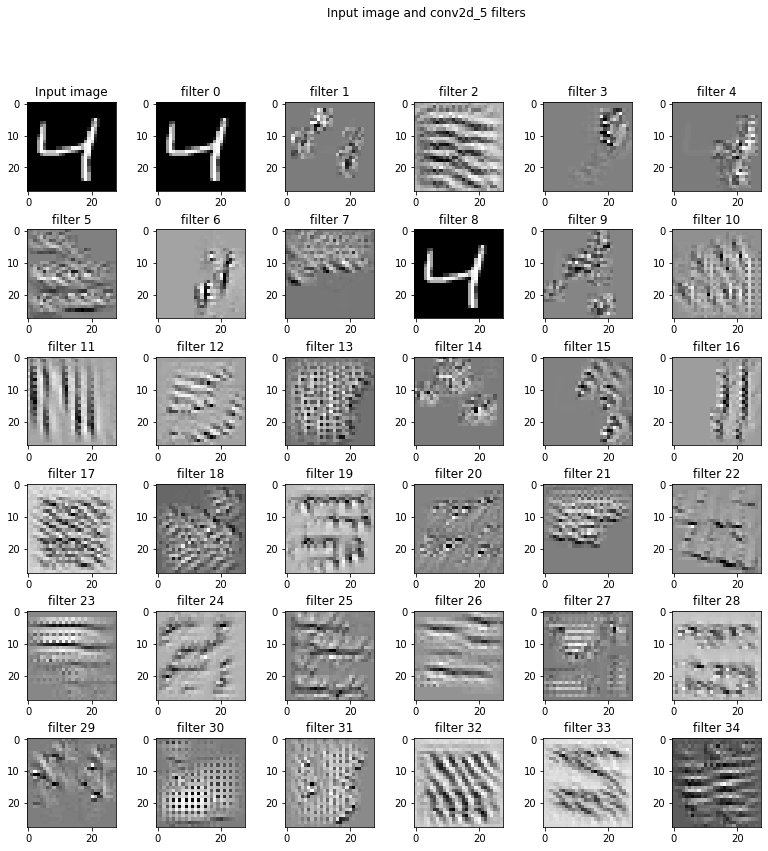

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()